In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
#import data
data = pd.read_csv('Dataset Inflammation Uretra.csv',sep=',')

In [3]:
#lihat dataset
data

,Temperature,Nausea,Lumbar Pain,Urine pushing,Micturition Pain,Burning of urethra,Inflammation of urinary bladder
0,35.5,no,yes,no,no,no,0
1,35.9,no,no,yes,yes,yes,1
2,35.9,no,yes,no,no,no,0
3,36.0,no,no,yes,yes,yes,1
4,36.0,no,yes,no,no,no,0
...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,0
116,41.5,no,no,no,no,no,0
117,41.5,yes,yes,no,yes,no,0
118,41.5,no,yes,yes,no,yes,0


In [4]:
#panggil 5 teratas
data.head()

,Temperature,Nausea,Lumbar Pain,Urine pushing,Micturition Pain,Burning of urethra,Inflammation of urinary bladder
0,35.5,no,yes,no,no,no,0
1,35.9,no,no,yes,yes,yes,1
2,35.9,no,yes,no,no,no,0
3,36.0,no,no,yes,yes,yes,1
4,36.0,no,yes,no,no,no,0


In [5]:
#karena selain temperature itu kategorik, jadiin dummy/kategorik dulu
dms = pd.get_dummies(data[['Nausea',	'Lumbar Pain',	'Urine pushing',	'Micturition Pain',	'Burning of urethra']],drop_first=True)
data= pd.concat([data,dms], axis=1 )
data = data.drop(['Nausea',	'Lumbar Pain',	'Urine pushing',	'Micturition Pain',	'Burning of urethra'],axis=1)
data.head()

,Temperature,Inflammation of urinary bladder,Nausea_yes,Lumbar Pain_yes,Urine pushing_yes,Micturition Pain_yes,Burning of urethra_yes
0,35.5,0,0,1,0,0,0
1,35.9,1,0,0,1,1,1
2,35.9,0,0,1,0,0,0
3,36.0,1,0,0,1,1,1
4,36.0,0,0,1,0,0,0


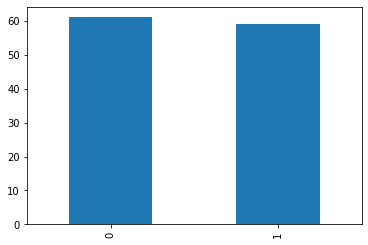

In [6]:
data['Inflammation of urinary bladder'].value_counts().plot(kind='bar')

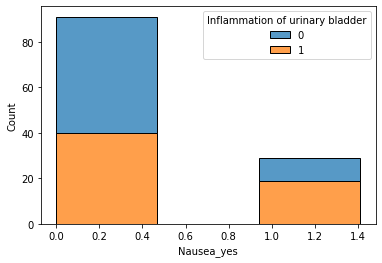

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.47, x="Nausea_yes", hue="Inflammation of urinary bladder", data=data, stat="count", multiple="stack")

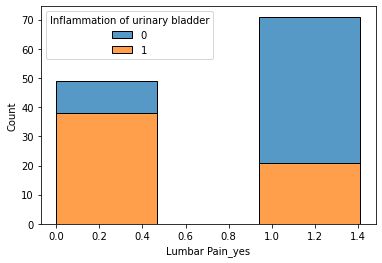

In [52]:
sns.histplot(binwidth=0.47, x="Lumbar Pain_yes", hue="Inflammation of urinary bladder", data=data, stat="count", multiple="stack")

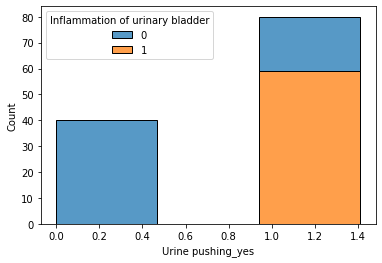

In [53]:
sns.histplot(binwidth=0.47, x="Urine pushing_yes", hue="Inflammation of urinary bladder", data=data, stat="count", multiple="stack")

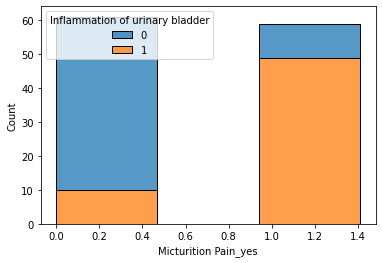

In [54]:
sns.histplot(binwidth=0.47, x="Micturition Pain_yes", hue="Inflammation of urinary bladder", data=data, stat="count", multiple="stack")

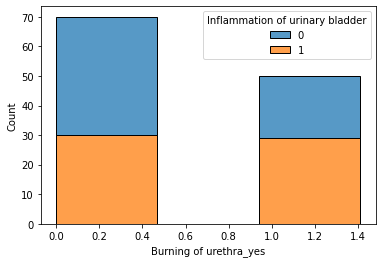

In [55]:
sns.histplot(binwidth=0.47, x="Burning of urethra_yes", hue="Inflammation of urinary bladder", data=data, stat="count", multiple="stack")

In [12]:
#choose x and y
y = data['Inflammation of urinary bladder']
X = data.drop(['Inflammation of urinary bladder'],axis=1)

In [16]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [17]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [18]:
# make a single prediction
yhat = logreg.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [21]:
#evaluate it
cm = confusion_matrix(y_test, yhat)
accuracy=accuracy_score(yhat,y_test)

In [22]:
accuracy

1.0

In [25]:
cm

array([[18,  0],
       [ 0, 18]])

In [32]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

